In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

%run graphing_function_recent.ipynb

In [2]:
#Use this for all adjustable values 
#input file paths here (include .csv):
video_path = r'\\10.25.16.5\yaochen\Active\DLC\Final_Models\Lindsey\escape_behavior_2-lindsey_christinger-2024-06-13_v1\V3_Tested2\coords_csv\CoordV3_M1_P2_6_21_24_videoDLC_resnet50_escape_behavior_2Jun13shuffle1_1030000_filtered_day.csv'
time_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\V3_updated\Timestamp\M1_P2_6_21_24_timestamp0.csv'
audio_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\V3_updated\Audio\M1_P2_6_21_24_audio.wav'

#input coordinates for the shelter and platform 
north_pixel = 26
south_pixel = 462
east_pixel = 570
west_pixel = 101
shelter_x_pixel = 320
shelter_y_pixel = 70

#input info from time_and_audio info notebook (either from audacity or bonsai)
stimulus_start = 494.334 #stimulus start time
stimulus_end = 501.963 #stimulus end time
escape_done = 495.7 #time mouse reaches shelter location

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [3]:
#manually decide?
escape_response = True
freezing_response = False
#small_angle = 

In [4]:
#read in DLC data, convert to cm, center platform at 0,0
shelter_x, shelter_y, x_diam, y_diam, coord_scaled = single_mouse_data(north_pixel, south_pixel, east_pixel, west_pixel, shelter_x_pixel, shelter_y_pixel, video_path)

In [5]:
#replace any head, nose, or center points with likelihood < .9 with NA
filter_data(.8, coord_scaled)

In [6]:
#coord_filtered

In [7]:
coord_scaled

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine1_likelihood,center_x,center_y,center_likelihood,spine2_x,spine2_y,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood
0,0,0,-10.631808,-12.265902,0.999926,-12.480631,-12.786348,0.999972,-12.784488,-12.034676,...,0.999997,-15.598817,-14.148314,0.999990,-17.258932,-14.960380,0.999999,-18.745114,-15.570062,1.000000
1,1,1,-10.631808,-12.094148,0.999938,-12.480631,-12.758911,0.999989,-12.784488,-12.019346,...,0.999999,-15.598817,-14.148314,0.999989,-17.258932,-14.960380,0.999999,-18.741744,-15.570062,1.000000
2,2,2,-10.631808,-12.094148,0.999921,-12.480631,-12.758911,0.999981,-12.784488,-12.019346,...,0.999999,-15.598817,-14.148314,0.999995,-17.258932,-14.960380,0.999999,-18.730880,-15.570062,1.000000
3,3,3,-10.829905,-12.094148,0.999847,-12.766819,-12.758911,0.999994,-13.112746,-12.034676,...,0.999999,-15.688974,-14.160400,0.999997,-17.319727,-14.990349,0.999999,-18.721243,-15.596154,1.000000
4,4,4,-11.251859,-12.194391,0.999861,-13.199115,-12.867023,0.999999,-13.419820,-12.115063,...,0.999998,-15.837836,-14.221765,0.999998,-17.415278,-15.012948,0.999999,-18.716319,-15.600610,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14238,14238,14238,28.388294,7.356127,0.560818,28.823275,9.151434,0.999554,29.662300,9.644272,...,0.999973,27.248869,10.590728,0.999946,25.775234,10.607563,0.999991,23.865420,10.792478,0.999999
14239,14239,14239,28.388294,7.356127,0.692133,28.846709,9.160447,0.999709,29.666786,9.651633,...,0.999975,27.241018,10.593815,0.999949,25.770701,10.615607,0.999992,23.865015,10.788866,0.999999
14240,14240,14240,28.388294,7.356127,0.538103,28.846709,9.225465,0.999477,29.624132,9.729367,...,0.999983,27.201826,10.593815,0.999966,25.746132,10.615607,0.999990,23.855473,10.776889,0.999999
14241,14241,14241,28.388294,7.356127,0.186046,28.823275,9.225465,0.999049,29.604739,9.729367,...,0.999987,27.141716,10.590728,0.999980,25.703336,10.607563,0.999993,23.853496,10.757915,0.999999


In [8]:
#convert timestamps to zeroed seconds
convert_time(time_path, coord_scaled)

In [9]:
#REPLACE ONCE WE HAVE STIMULUS TIMESTAMPS
#returns start and stop times of stimulus.
start, stimulus_end = audio_timing(stimulus_start, stimulus_end, audio_path, coord_scaled['time'].iloc[-1])

In [10]:
#find time stimulus ends and mouse reaches shelter(escape) if stimulus is set to 0s
end, escape = time_set_zero(start, stimulus_end, escape_done, coord_scaled)

In [11]:
#calculate displacement as 'displacement'
displacement(shelter_x, shelter_y, coord_scaled)

In [12]:
#calculate speed as 'speed' and change in displacement as 'delta_vector'
total_distance = speed(coord_scaled)

In [13]:
#calculate head angle as 'head_angle'
angle(shelter_x, shelter_y, coord_scaled)

In [14]:
#calculate head angle speed as 'angle_speed'
angle_speed(coord_scaled)

In [15]:
#create dataframes isolated to 4 ranges: just shelter reaching, 3 seconds before and 6 after, 2 before and 4 after, and 1 where you can input your own parameters
#return 4 dataframes 
escape_only, four_second, six_second, long_range = dataframe_ranges(-15, 30, escape,coord_scaled)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

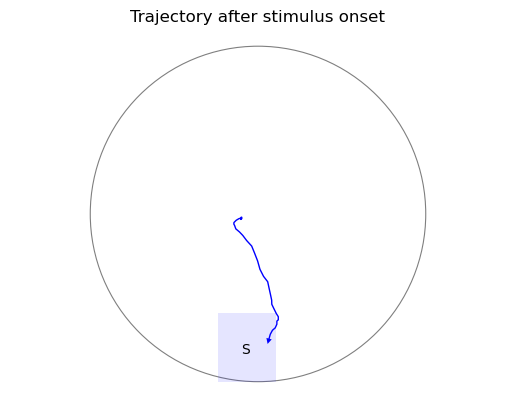

In [16]:
trajectory(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

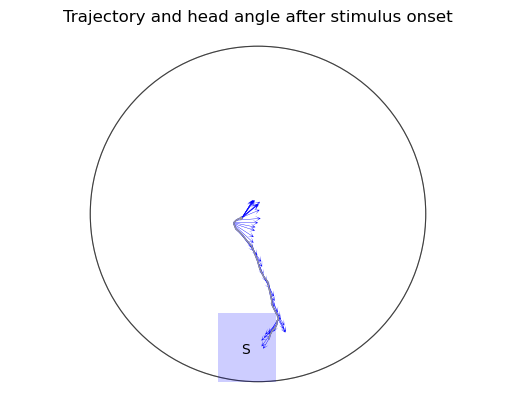

In [17]:
head_angle_trajectory_figure(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

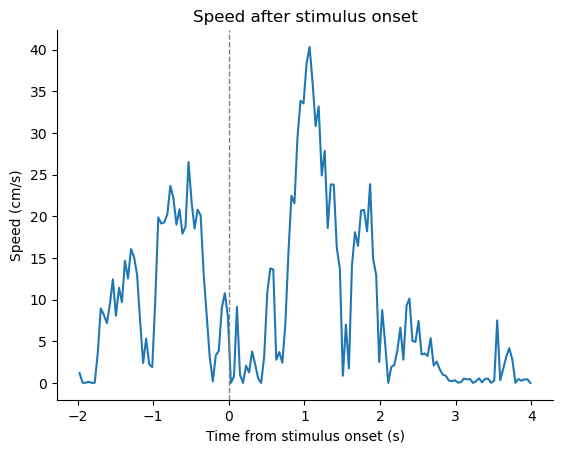

In [18]:
speed_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

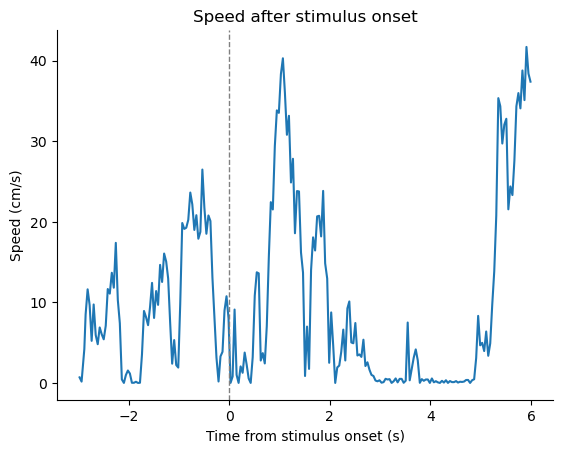

In [19]:
speed_figure(six_second['time_set'].iloc[-1],4, six_second)


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

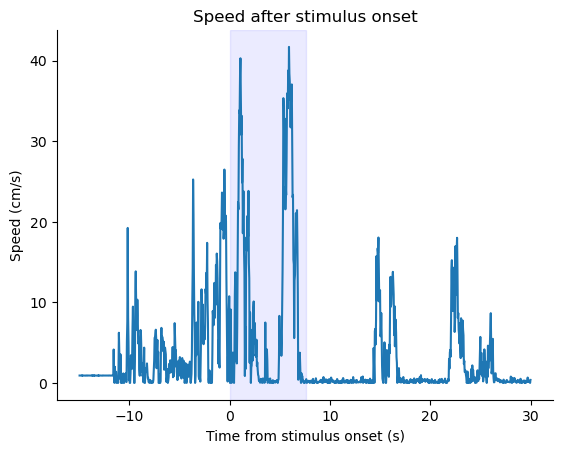

In [20]:
speed_figure(end,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

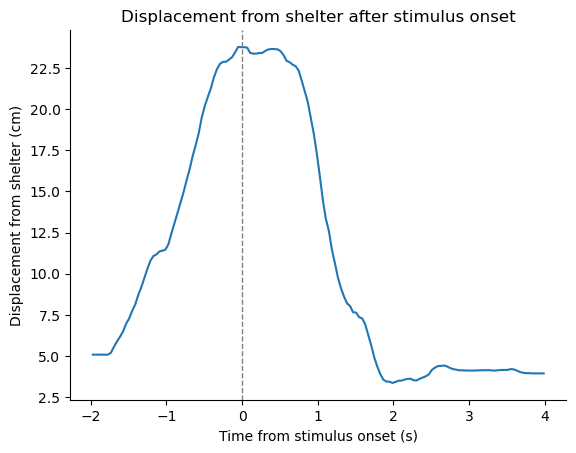

In [21]:
displacement_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

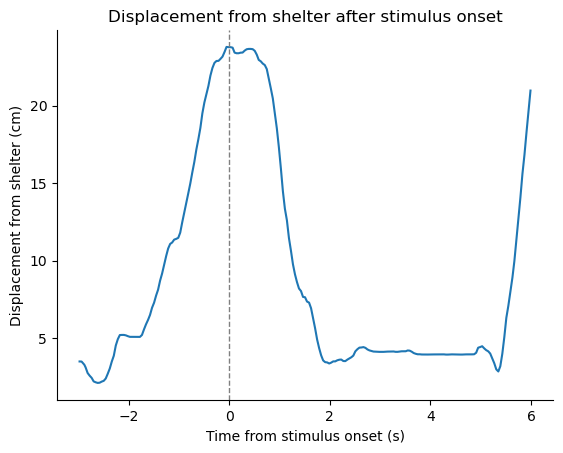

In [22]:
displacement_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

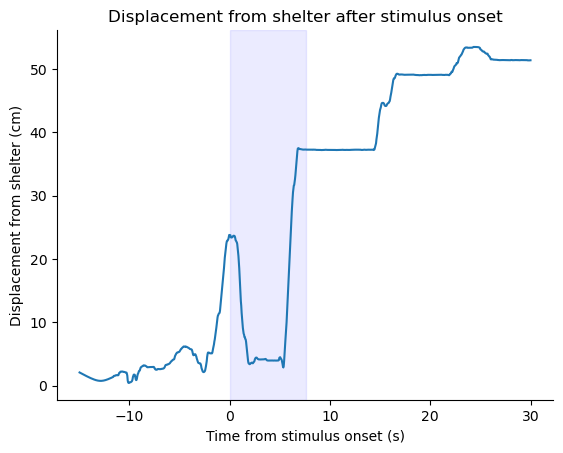

In [23]:
displacement_figure(end,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

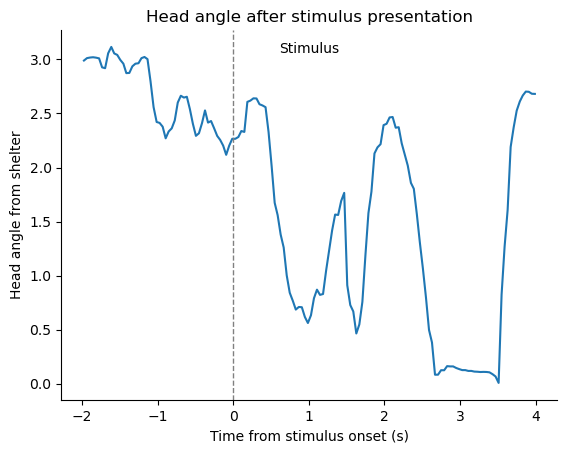

In [24]:
head_angle_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

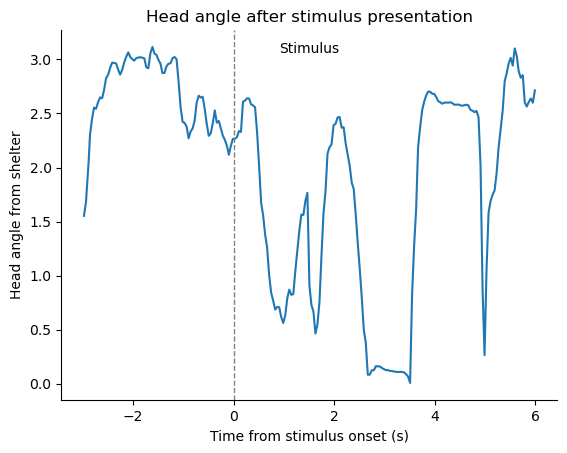

In [25]:
head_angle_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

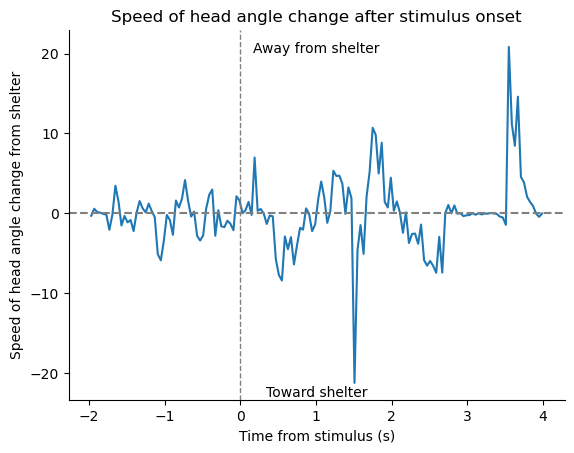

In [26]:
angle_speed_figure(four_second['time_set'].iloc[-1], 4,four_second)

In [27]:
ratio, initial_displacement, total_distance = linearity_ratio(escape_only)

In [28]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine3_x,spine3_y,spine3_likelihood,time,time_set,displacement,speed,delta_vector,head_angle,angle_speed
12344,12344,12344,0.955586,2.959627,0.999226,-0.558118,1.833982,0.999990,-1.040599,2.315728,...,-5.727978,-3.521166,0.999997,493.882458,0.027082,23.764921,0.000000,0.000000,2.265845,0.000000
12345,12345,12345,0.904184,2.959627,0.998396,-0.558118,1.833982,0.999981,-1.089754,2.310783,...,-5.727978,-3.521166,0.999995,493.923418,0.068042,23.732452,0.793369,0.032496,2.282467,0.405815
12346,12346,12346,0.751662,2.959627,0.999740,-0.844499,1.554426,0.999975,-1.473698,1.896169,...,-5.739680,-3.747821,0.999997,493.962535,0.107159,23.412575,9.110729,0.356384,2.337859,1.416045
12347,12347,12347,0.684713,2.959627,0.999442,-0.928202,1.554426,0.999951,-1.475453,1.896169,...,-5.739680,-3.771923,0.999997,494.002560,0.147184,23.372518,1.001997,0.040105,2.329458,-0.209897
12348,12348,12348,0.067672,3.177913,0.999352,-0.982438,1.554426,0.999961,-1.679301,1.896169,...,-5.739680,-3.785697,0.999997,494.042368,0.186992,23.372518,0.000000,0.000000,2.607341,6.980581
12349,12349,12349,0.067672,3.450189,0.999471,-0.982438,1.781964,0.999941,-1.679301,1.955846,...,-5.720246,-3.784963,0.999997,494.082381,0.227005,23.409210,2.053625,0.082172,2.619320,0.299388
12350,12350,12350,0.067672,3.655522,0.999765,-0.982438,1.905951,0.999941,-1.679301,2.119498,...,-5.689818,-3.784963,0.999996,494.122394,0.267018,23.417200,1.256504,0.050276,2.640372,0.526129
12351,12351,12351,0.094297,3.729686,0.999843,-0.895861,2.096489,0.999957,-1.541477,2.361601,...,-5.626747,-3.784963,0.999995,494.163072,0.307696,23.542137,3.767720,0.153263,2.638915,-0.035832
12352,12352,12352,0.261458,3.850449,0.999916,-0.837577,2.244625,0.999978,-1.458111,2.575694,...,-5.617011,-3.731714,0.999995,494.202535,0.347159,23.629799,2.276208,0.089826,2.585701,-1.348439
12353,12353,12353,0.301071,3.850449,0.999968,-0.825883,2.244625,0.999979,-1.400200,2.575694,...,-5.617011,-3.677382,0.999996,494.242445,0.387069,23.652066,0.558340,0.022283,2.574395,-0.283280


In [29]:
likelihood_data, likelihood_minus_nose, likelihood_center = likelihood_check(0, 8, .9, coord_scaled)

In [30]:
likelihood_data #need to adjust time frame to be useful 

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine3_x,spine3_y,spine3_likelihood,time,time_set,displacement,speed,delta_vector,head_angle,angle_speed
12392,12392,12392,-0.094542,-29.414201,0.720830,0.299265,-28.533898,0.999998,1.146971,-28.757004,...,2.501707,-21.024114,0.999998,495.803443,1.948067,3.434552,12.962424,0.526793,2.216116,0.721239
12393,12393,12393,-0.078775,-29.683551,0.687056,0.209572,-28.651351,0.999997,1.077358,-28.898662,...,2.347959,-21.274901,0.999997,495.842995,1.987619,3.365446,2.500467,0.098898,2.392272,4.453777
12394,12394,12394,-0.063009,-29.952901,0.587089,0.209572,-29.058545,0.999998,1.077358,-29.321025,...,2.278453,-21.584413,0.999998,495.882816,2.027440,3.421755,8.752754,0.348543,2.404705,0.312240
12396,12396,12396,0.170507,-30.222251,0.835669,0.390763,-29.214149,0.999999,1.204870,-29.357405,...,2.263013,-21.666074,0.999994,495.963072,2.107696,3.502110,0.000000,0.000000,2.467498,0.099553
12397,12397,12397,0.170507,-30.198812,0.774395,0.475304,-29.214149,0.999999,1.269394,-29.357405,...,2.263013,-21.666074,0.999996,496.003418,2.148042,3.571408,1.924607,0.077650,2.368559,-2.452275
12404,12404,12404,-0.614241,-27.983383,0.768083,0.372418,-27.145173,0.999998,1.151103,-27.699942,...,3.036661,-20.786733,0.999998,496.282919,2.427543,3.766867,5.025255,0.200176,1.568991,-5.885002
12405,12405,12405,-0.687706,-27.413002,0.376806,0.372418,-26.834257,0.999999,1.151103,-27.426163,...,3.150300,-20.766686,0.999997,496.322957,2.467581,3.875925,4.921468,0.197046,1.305971,-6.569263
12406,12406,12406,-0.761171,-26.842620,0.462201,0.357335,-26.444721,0.999992,1.069884,-27.102466,...,3.219861,-20.766686,0.999998,496.362983,2.507607,4.150197,7.438904,0.297750,1.066315,-5.987504
12434,12434,12434,0.558283,-26.580885,0.266635,0.931584,-25.645707,0.999993,1.713428,-25.978490,...,4.132853,-20.641381,0.999997,497.483341,3.627965,4.127411,1.698790,0.067930,1.606853,8.455296
12435,12435,12435,1.263210,-27.006675,0.875070,1.158239,-26.096904,0.999991,1.921909,-26.248808,...,4.081690,-20.641381,0.999998,497.523303,3.667927,4.038954,3.138723,0.125430,2.190214,14.597906


In [31]:
rotate, shelter_rotate_x, shelter_rotate_y = rotate_trajectory(shelter_x, shelter_y, escape_only)
normalized_df, shelter_normalized_x, shelter_normalized_y, combined_range = normalize_rotation(rotate, shelter_rotate_x, shelter_rotate_y)

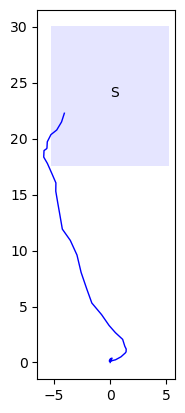

In [32]:
fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
    #make x and y scales equal - present as a circle


    #plot the center x and y coordinates
x = rotate['rotated_x']
y = rotate['rotated_y']

ax.text(shelter_rotate_x,shelter_rotate_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_rotate_x - 5.25), (shelter_rotate_y-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)


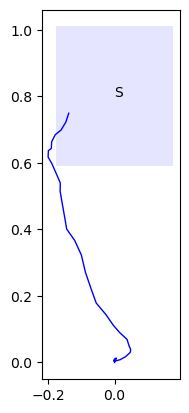

In [33]:

fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
x = normalized_df['x']
y = normalized_df['y']

ax.text(shelter_normalized_x,shelter_normalized_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_normalized_x - 5.25/combined_range), (shelter_normalized_y-6.25/combined_range)), 10.5/combined_range,12.5/combined_range,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)
    

